In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Dell\Documents\multiple_disease_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Load the dataset
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\diseases\\heart_disease_uci.csv")


In [8]:
# Drop unnecessary columns
df.drop(columns=['id', 'dataset'], inplace=True)

# Convert target to binary
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
# Separate features and target
X = df.drop("num", axis=1)
y = df["num"]

In [11]:
# Separate categorical and numeric columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values for numeric columns
num_imputer = SimpleImputer(strategy="median")
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

# Handle missing values and encode categorical columns
cat_imputer = SimpleImputer(strategy="most_frequent")
X_cat_imputed = cat_imputer.fit_transform(X[cat_cols])

In [12]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat_imputed),
                             columns=encoder.get_feature_names_out(cat_cols))


In [13]:
# Combine processed numerical and categorical features
X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [15]:
# Save processed datasets
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [16]:
train_df.to_csv("heart_train_onehot.csv", index=False)
test_df.to_csv("heart_test_onehot.csv", index=False)

In [17]:
# Train LightGBM
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543478 -> initscore=0.174353
[LightGBM] [Info] Start training from score 0.174353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(random_state=42)

In [18]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        75
           1       0.90      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [20]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\Dell\Documents\multiple_disease_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


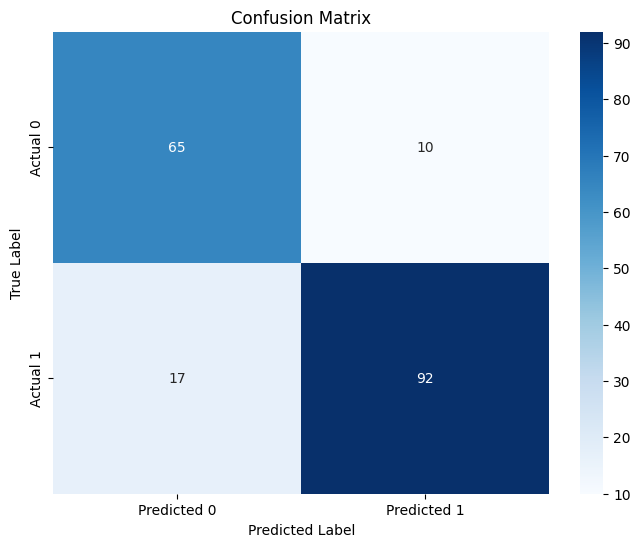

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [22]:
X_train.columns.to_list()


['age',
 'trestbps',
 'chol',
 'thalch',
 'oldpeak',
 'ca',
 'sex_Female',
 'sex_Male',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'fbs_False',
 'fbs_True',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'exang_False',
 'exang_True',
 'slope_downsloping',
 'slope_flat',
 'slope_upsloping',
 'thal_fixed defect',
 'thal_normal',
 'thal_reversable defect']

In [27]:
!pip install joblib

You should consider upgrading via the 'C:\Users\Dell\Documents\multiple_disease_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
import joblib

In [29]:
# Save the model and scalers
joblib.dump(model, "heart_model.pkl")
joblib.dump(num_imputer, "num_imputer.pkl")
joblib.dump(cat_imputer, "cat_imputer.pkl")
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [31]:
import numpy as np

# Example input (must match model input dimensions)
input_data = np.array([[40.0	,150.0	,392.0	,130.0	,2.0	,0.0	,1.0	,0.0	,1.0	,0.0	,0.0	,0.0	,1.0	,0.0	,0.0	,1.0	,0.0	,1.0	,0.0	,0.0	,1.0	,0.0	,1.0	,0.0	,0.0]])

# Make prediction
prediction = model.predict(input_data)

# Predict
if prediction[0] == 0:
    print("Prediction:", prediction[0], "- No heart disease predicted.")
else:
    print("Prediction:", prediction[0], "- Heart disease predicted.")

Prediction: 1 - Heart disease predicted.


c:\Users\Dell\Documents\multiple_disease_detection\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
